In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [5]:
import numpy as np

# From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.
X = mnist.data
Y = mnist.target.astype(int)

x_tr, x_ts = X.iloc[:10_000], X.iloc[10_000:12_000]
y_tr, y_ts = Y.iloc[:10_000], Y.iloc[10_000:12_000]

# Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.
# By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
x_tr_53 = np.r_[x_tr[y_tr == 5].values, x_tr[y_tr == 3].values]
y_tr_53 = np.r_[y_tr[y_tr == 5].values, y_tr[y_tr == 3].values]
y_tr_53[y_tr_53 == 5] = 1
y_tr_53[y_tr_53 == 3] = -1

# Test
x_ts_53 = np.r_[x_ts[y_ts == 5].values, x_ts[y_ts == 3].values]
y_ts_53 = np.r_[y_ts[y_ts == 5].values, y_ts[y_ts == 3].values]
y_ts_53[y_ts_53 == 5] = 1
y_ts_53[y_ts_53 == 3] = -1
print(x_tr_53.shape, y_tr_53.shape, np.unique(y_tr_53), x_ts_53.shape, y_ts_53.shape, np.unique(y_ts_53))

(1895, 784) (1895,) [-1  1] (381, 784) (381,) [-1  1]


In [6]:
# Instantiate a perceptron classifier with the below parameters
# random_state = 42
# learning rate = 1
# Train for 100 iterations (epoch)
# Should shuffle the dataset for each epoch (iteration)
# Include the intercept (bias) term.
# No regularization
from sklearn.linear_model import Perceptron

perc = Perceptron(random_state=42, eta0=1, shuffle=True, alpha=0)

In [7]:
# 1) Which of the following is a pair that gives the number of training samples for digit 5 and digit 3?
(y_tr_53 == 1).sum(), (y_tr_53 == -1).sum()

(863, 1032)

In [9]:
for i in range(100):
    perc.partial_fit(x_tr_53, y_tr_53, classes=[-1, 1])

/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


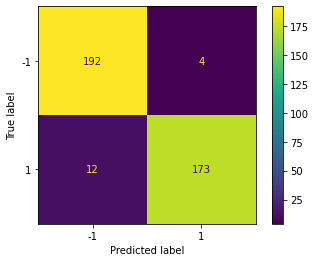

In [11]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(perc, x_ts_53, y_ts_53)

/home/jaidevd/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


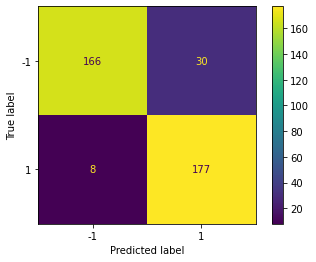

In [24]:
# Apply linear PCA and reduce the dimention of the datapoints to 10.
# Set n_components=10, random_state=1 for PCA.
# Train perceptron classifier with same settings (shuffle = True) and use the trained model to make predictions on test data.
# Which of the following option gives the correct values inferred from confusion matrix?
from sklearn.decomposition import PCA

pca = PCA(n_components=10, random_state=1)

xr_tr_53 = pca.fit_transform(x_tr_53)
xr_ts_53 = pca.transform(x_ts_53)

perc = Perceptron(random_state=42, eta0=1, shuffle=True, alpha=0.01, penalty='l1')
for i in range(100):
    perc.partial_fit(xr_tr_53, y_tr_53, classes=[-1, 1])
perc.fit(xr_tr_53, y_tr_53)

plot_confusion_matrix(perc, xr_ts_53, y_ts_53)

In [27]:
d = dict(TP= 119, TN= 93, FP= 77, FN= 92), dict(TP= 119, TN= 93, FP= 92, FN= 77), dict(TP= 93, TN= 119, FP= 92, FN= 77), dict(TP= 93, TN= 119, FP= 77, FN= 92)

def acc_prec_recall(p):
    acc = (p['TP'] + p['TN']) / sum(p.values())
    prec = p['TP'] / (p['TP'] + p['FP'])
    rec = p['TP'] / (p['TP'] + p['FN'])
    return acc, prec, rec

for p in d:
    print(acc_prec_recall(p))

(0.5564304461942258, 0.6071428571428571, 0.5639810426540285)
(0.5564304461942258, 0.5639810426540285, 0.6071428571428571)
(0.5564304461942258, 0.5027027027027027, 0.5470588235294118)
(0.5564304461942258, 0.5470588235294118, 0.5027027027027027)
